<a href="https://colab.research.google.com/github/Ddasunsandeepa/Image-Classifier/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
!pip install opendatasets
import opendatasets as od

In [131]:
data = od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

Skipping, found downloaded files in "./cats-and-dogs-for-classification" (use force=True to force download)


In [132]:
IMAGE_SIZE=(128,128)
BATCH_SIZE=32

In [133]:
train_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train/"
test_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test/"

In [134]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    validation_split=0.1,
    subset='training',
    seed=42,
)

val_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    validation_split=0.1,
    subset='validation',
    seed=42,
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
)

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [135]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [136]:
for image_batch, label_batch in train_data.take(1):
    print(image_batch. shape)
    print(label_batch. shape)

(32, 128, 128, 3)
(32,)


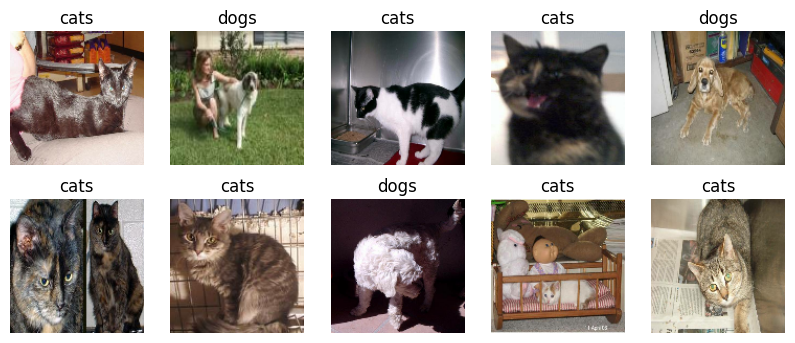

In [137]:
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [138]:
for image,label in train_data.take(1):
    for i in range(1):
        print(image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [139]:
train_data = train_data.map(lambda x,y: (x/255,y))
val_data = val_data.map(lambda x,y: (x/255,y))
test_data = test_data.map(lambda x,y: (x/255,y))

In [140]:
for image,label in train_data.take(1):
    for i in range(1):
        print(image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [141]:
data_augnentation = tf.keras.Sequential(
[
tf.keras.layers.RandomFlip('horizontal', input_shape=(128,128,3)),
tf.keras.layers.RandomRotation(0.2),
tf.keras.layers.RandomZoom(0.2),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [142]:
model = tf.keras.Sequential()

model.add(data_augnentation)
model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [143]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [144]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
loss=tf.keras.losses.BinaryCrossentropy(),
metrics = ['accuracy']
)

In [145]:
start_time = time.time()

history = model.fit(train_data,
epochs=20,
validation_data = val_data)

end_time = time.time()

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 68ms/step - accuracy: 0.5661 - loss: 0.7134 - val_accuracy: 0.5825 - val_loss: 0.6630
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.6238 - loss: 0.6467 - val_accuracy: 0.5825 - val_loss: 0.6750
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.6475 - loss: 0.6242 - val_accuracy: 0.6913 - val_loss: 0.5865
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.6458 - loss: 0.6230 - val_accuracy: 0.6150 - val_loss: 0.6556
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6732 - loss: 0.5947 - val_accuracy: 0.6150 - val_loss: 0.6214
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6866 - loss: 0.5900 - val_accuracy: 0.7212 - val_loss: 0.5436
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6982 - loss: 0.5729 - val_accuracy: 0.7013 - val_loss: 0.5719
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7153 - loss: 0.5523 - val_a

In [146]:
history.history

{'accuracy': [0.5927777886390686,
  0.6263889074325562,
  0.6495833396911621,
  0.6588888764381409,
  0.6733333468437195,
  0.6811110973358154,
  0.70291668176651,
  0.7191666960716248,
  0.7233333587646484,
  0.7365278005599976,
  0.7524999976158142,
  0.7483333349227905,
  0.7566666603088379,
  0.7691666483879089,
  0.7797222137451172,
  0.7790277600288391,
  0.785694420337677,
  0.7836111187934875,
  0.793749988079071,
  0.7947221994400024],
 'loss': [0.6804316639900208,
  0.6413848400115967,
  0.6193440556526184,
  0.6142489910125732,
  0.5954305529594421,
  0.5923605561256409,
  0.5713196992874146,
  0.5485233664512634,
  0.5428023338317871,
  0.524591326713562,
  0.5090919137001038,
  0.506654679775238,
  0.49497532844543457,
  0.4854079782962799,
  0.4667925238609314,
  0.4757841229438782,
  0.4527455270290375,
  0.44844359159469604,
  0.4347793459892273,
  0.4325161278247833],
 'val_accuracy': [0.5824999809265137,
  0.5824999809265137,
  0.6912500262260437,
  0.6150000095367432

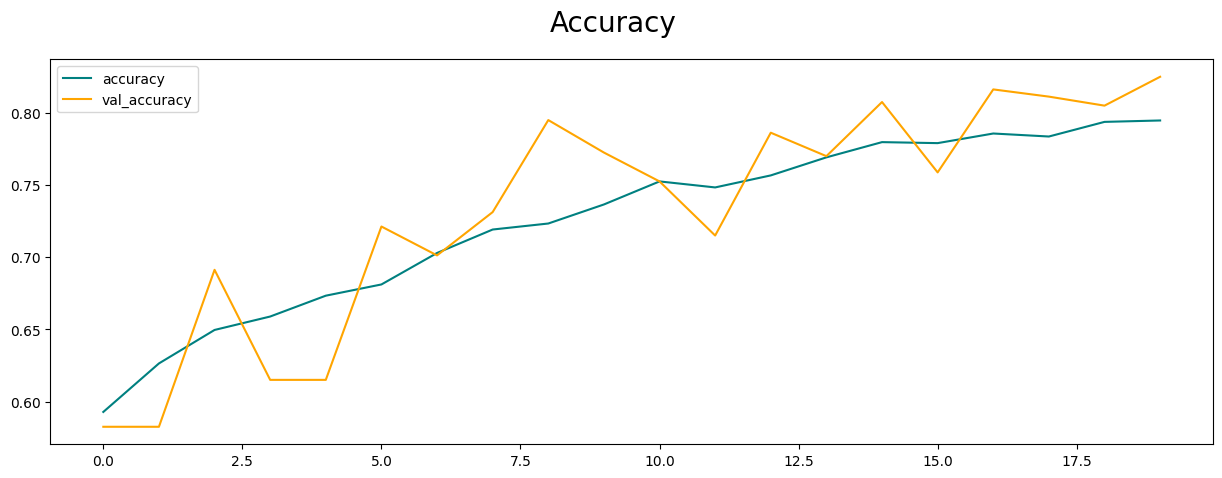

In [147]:
fig = plt.figure(figsize=(15,5))

plt.plot(history.history['accuracy'], color='teal', label = 'accuracy'),
plt.plot(history.history['val_accuracy'], color ='orange', label ='val_accuracy'),
fig. suptitle('Accuracy', fontsize=20)

plt.legend()

plt. show()

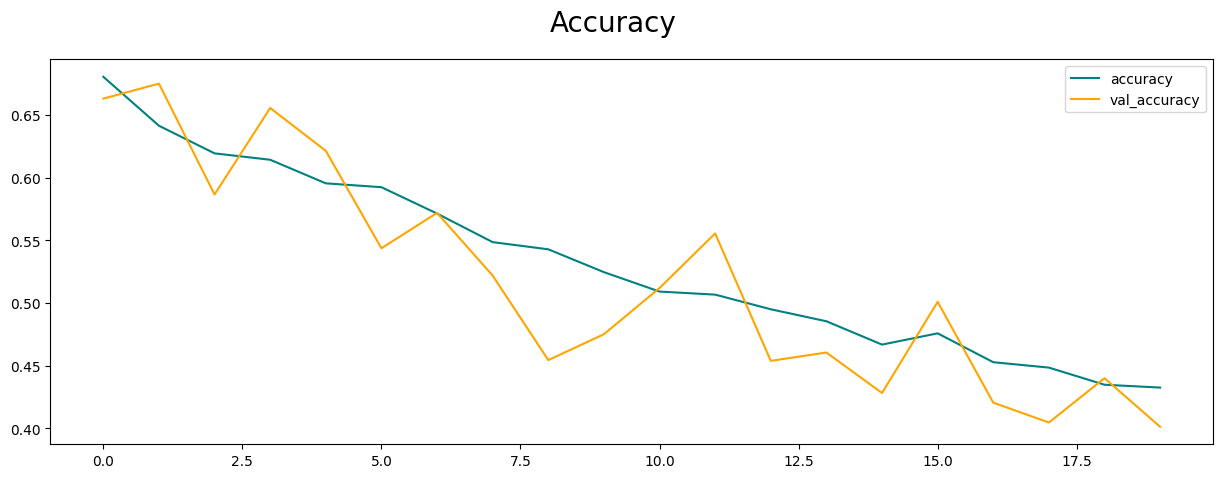

In [148]:
fig = plt.figure(figsize=(15,5))

plt.plot(history.history['loss'], color='teal', label = 'accuracy'),
plt.plot(history.history['val_loss'], color ='orange', label ='val_accuracy'),
fig. suptitle('Accuracy', fontsize=20)

plt.legend()

plt. show()

In [149]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [150]:
for batch in test_data.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy. update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

In [151]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.793038547039032>

In [152]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8429999947547913>

In [153]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8115000128746033>

In [154]:
!pip install opencv-python

In [155]:
import cv2

In [156]:
import cv2
print(cv2.__version__)


4.12.0


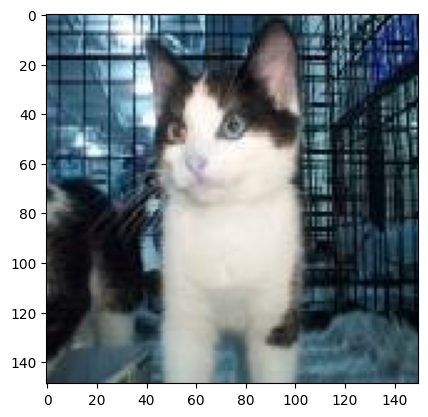

In [157]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/train/cats/cat.1000.jpg')
plt.imshow(img)
plt.show()

In [158]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [159]:
scaled_image.shape

TensorShape([128, 128, 3])

In [160]:
np.expand_dims(scaled_image,0).shape


(1, 128, 128, 3)

In [161]:
pred = model.predict(np.expand_dims(scaled_image,0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.09954364]], dtype=float32)

In [162]:
if pred>0.5:
  pred = class_names[1]

In [163]:
class_names[0]

'cats'

In [164]:
def predic(path):
  img = cv2.imread(path)
  resized_image = tf.image.resize(img, IMAGE_SIZE)
  scaled_image = resized_image/255
  pred = model.predict(np.expand_dims(scaled_image,0))
  pred = pred.squeeze()
  if pred>0.5:
    pred = class_names[0]
    print("dog")
  else:
    print('cat')

In [165]:
result = predic('/content/cats-and-dogs-for-classification/cats_dogs/train/dogs/dog.10.jpg')
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
dog


In [166]:
pred = class_names[1]
pred

'dogs'